### IMPORTING ESSENTIALS

In [103]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

***USER DEFINED FUNCTIONS***

(These functions help to  make our code look clean)
***ALERT DO NOT MODIFY***

In [104]:
def mapping(crops):
    print("Mapping:")
    for i, crop in enumerate(crops):
        print(f"  '{crop}' → {i}", end= ' , ')
        if i%5 ==0 :
            print()

def analysis(x_test,y_test,label_crops,prediction_encoded,number):
    print("Details Analysis")
    for i in range(number):
        features = x_test.iloc[i].values
        actual = label_crops.inverse_transform(y_test)[i]
        predicted = label_crops.inverse_transform(prediction_encoded)[i]
        print(f"{features}\n → Predicted: {predicted}, Actual: {actual} {'✓' if actual == predicted else '✗'}")

def get_high_confidence_recommendations(model, input_features, crop_encoder, threshold=0.5):
    """
    Get only crops with probability > threshold
    """
    # Get probabilities for all crops
    probabilities = model.predict_proba([input_features])[0]
    
    # Get all crop names
    crop_names = crop_encoder.classes_
    
    # Filter crops with probability > threshold
    high_confidence_crops = []
    for crop, prob in zip(crop_names, probabilities):
        if prob > threshold:
            high_confidence_crops.append({
                'crop': crop,
                'percentage': f"{prob:.1%}"
            })
            
    
    # Sort by probability (highest first)
    high_confidence_crops.sort(key=lambda x: x['percentage'], reverse=True)
    
    return high_confidence_crops

### LOADING DATA

In [105]:
crops_data = pd.read_csv('final_merged_dataset.csv')
print(f"\nWe have {len(crops_data)} samples with {len(crops_data.columns)-1} features each!")
print(crops_data.describe())


We have 10200 samples with 8 features each!
           Nitrogen   Phosphorous     Potassium   Temparature      Humidity  \
count  10200.000000  10200.000000  10200.000000  10200.000000  10200.000000   
mean      25.357549     26.029216     13.456765     29.320284     61.857428   
std       24.054158     24.034271     30.129301      5.003075     13.593859   
min        0.000000      0.000000      0.000000      8.825675     14.258040   
25%       10.000000     10.000000      0.000000     25.840000     53.700000   
50%       17.000000     21.000000      3.000000     29.260000     60.410000   
75%       35.000000     36.000000     15.000000     32.760000     68.340000   
max      140.000000    145.000000    205.000000     43.675493     99.981876   

                 Ph      Moisture      rainfall  
count  10200.000000  10200.000000  10200.000000  
mean       6.454295     47.365995    609.009308  
std        0.815305     14.661385    427.773570  
min        3.504752     20.000000     20.21

**We Have to level out crops name as 0,1,2,3**

In [106]:
label_crops = LabelEncoder()
crops_data['Crops Name Encoded'] = label_crops.fit_transform(crops_data['Crop Type'])
mapping(label_crops.classes_)

Mapping:
  'Barley' → 0 , 
  'Cotton' → 1 ,   'Ground Nuts' → 2 ,   'Maize' → 3 ,   'Millets' → 4 ,   'Oil seeds' → 5 , 
  'Paddy' → 6 ,   'Pulses' → 7 ,   'Sugarcane' → 8 ,   'Tobacco' → 9 ,   'Wheat' → 10 , 
  'apple' → 11 ,   'banana' → 12 ,   'blackgram' → 13 ,   'chickpea' → 14 ,   'coconut' → 15 , 
  'coffee' → 16 ,   'cotton' → 17 ,   'grapes' → 18 ,   'jute' → 19 ,   'kidneybeans' → 20 , 
  'lentil' → 21 ,   'maize' → 22 ,   'mango' → 23 ,   'mothbeans' → 24 ,   'mungbean' → 25 , 
  'muskmelon' → 26 ,   'orange' → 27 ,   'papaya' → 28 ,   'pigeonpeas' → 29 ,   'pomegranate' → 30 , 
  'rice' → 31 ,   'watermelon' → 32 , 

In [107]:
X = crops_data[['Nitrogen', 'Phosphorous', 'Potassium', 'Temparature','Humidity','Ph','Moisture','rainfall']]
y = crops_data['Crops Name Encoded']

### CREATING THE MODEL

In [108]:
#Spliting The data For Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,shuffle=True,random_state=42)
output_test = y_test
y_test =list(y_test)

In [109]:
model = RandomForestClassifier(n_estimators=600,random_state=42)
model.fit(X_train,y_train)

,n_estimators,600
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### TESTING OUR MODEL


#### Importing Essentials

In [110]:
from sklearn.metrics import accuracy_score

In [118]:
prediction_ecoded = model.predict(X_test)
acuracy = accuracy_score(y_test,prediction_ecoded)
print(prediction_ecoded)

[19  5 19 ...  0  3  5]


In [112]:
print(acuracy*100)

57.84313725490197


### ANALYSING OUT MODEL

In [113]:
analysis(x_test=X_test,y_test=y_test,label_crops=label_crops,prediction_encoded=prediction_ecoded,number=10)

Details Analysis
[ 71.          56.          37.          23.18866654  86.20899734
   6.49150625  40.35169231 176.103677  ]
 → Predicted: jute, Actual: jute ✓
[ 37.           0.           2.          22.92        43.75
   7.62538222  24.45       490.1004321 ]
 → Predicted: Oil seeds, Actual: Oil seeds ✓
[ 62.          59.          41.          24.2248758   74.89465426
   7.17517066  65.05259652 192.4931257 ]
 → Predicted: jute, Actual: jute ✓
[ 35.           0.           0.          28.32        59.85
   4.51436204  58.07       606.9740164 ]
 → Predicted: Maize, Actual: Pulses ✗
[ 11.          10.          45.          22.63045168  88.45577158
   6.39799561  59.50773018 109.0357597 ]
 → Predicted: pomegranate, Actual: pomegranate ✓
[4.20000000e+01 1.00000000e+00 0.00000000e+00 3.95700000e+01
 7.19500000e+01 8.21798364e+00 4.87900000e+01 1.37466302e+03]
 → Predicted: Sugarcane, Actual: Sugarcane ✓
[ 16.          42.           0.          35.85        62.3
   5.64542147  36.56       506.

### DRAWING CONFUTION MATRIX

#### Importing Essentials

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

***Confusion Matrix***

Confusion Matrix:


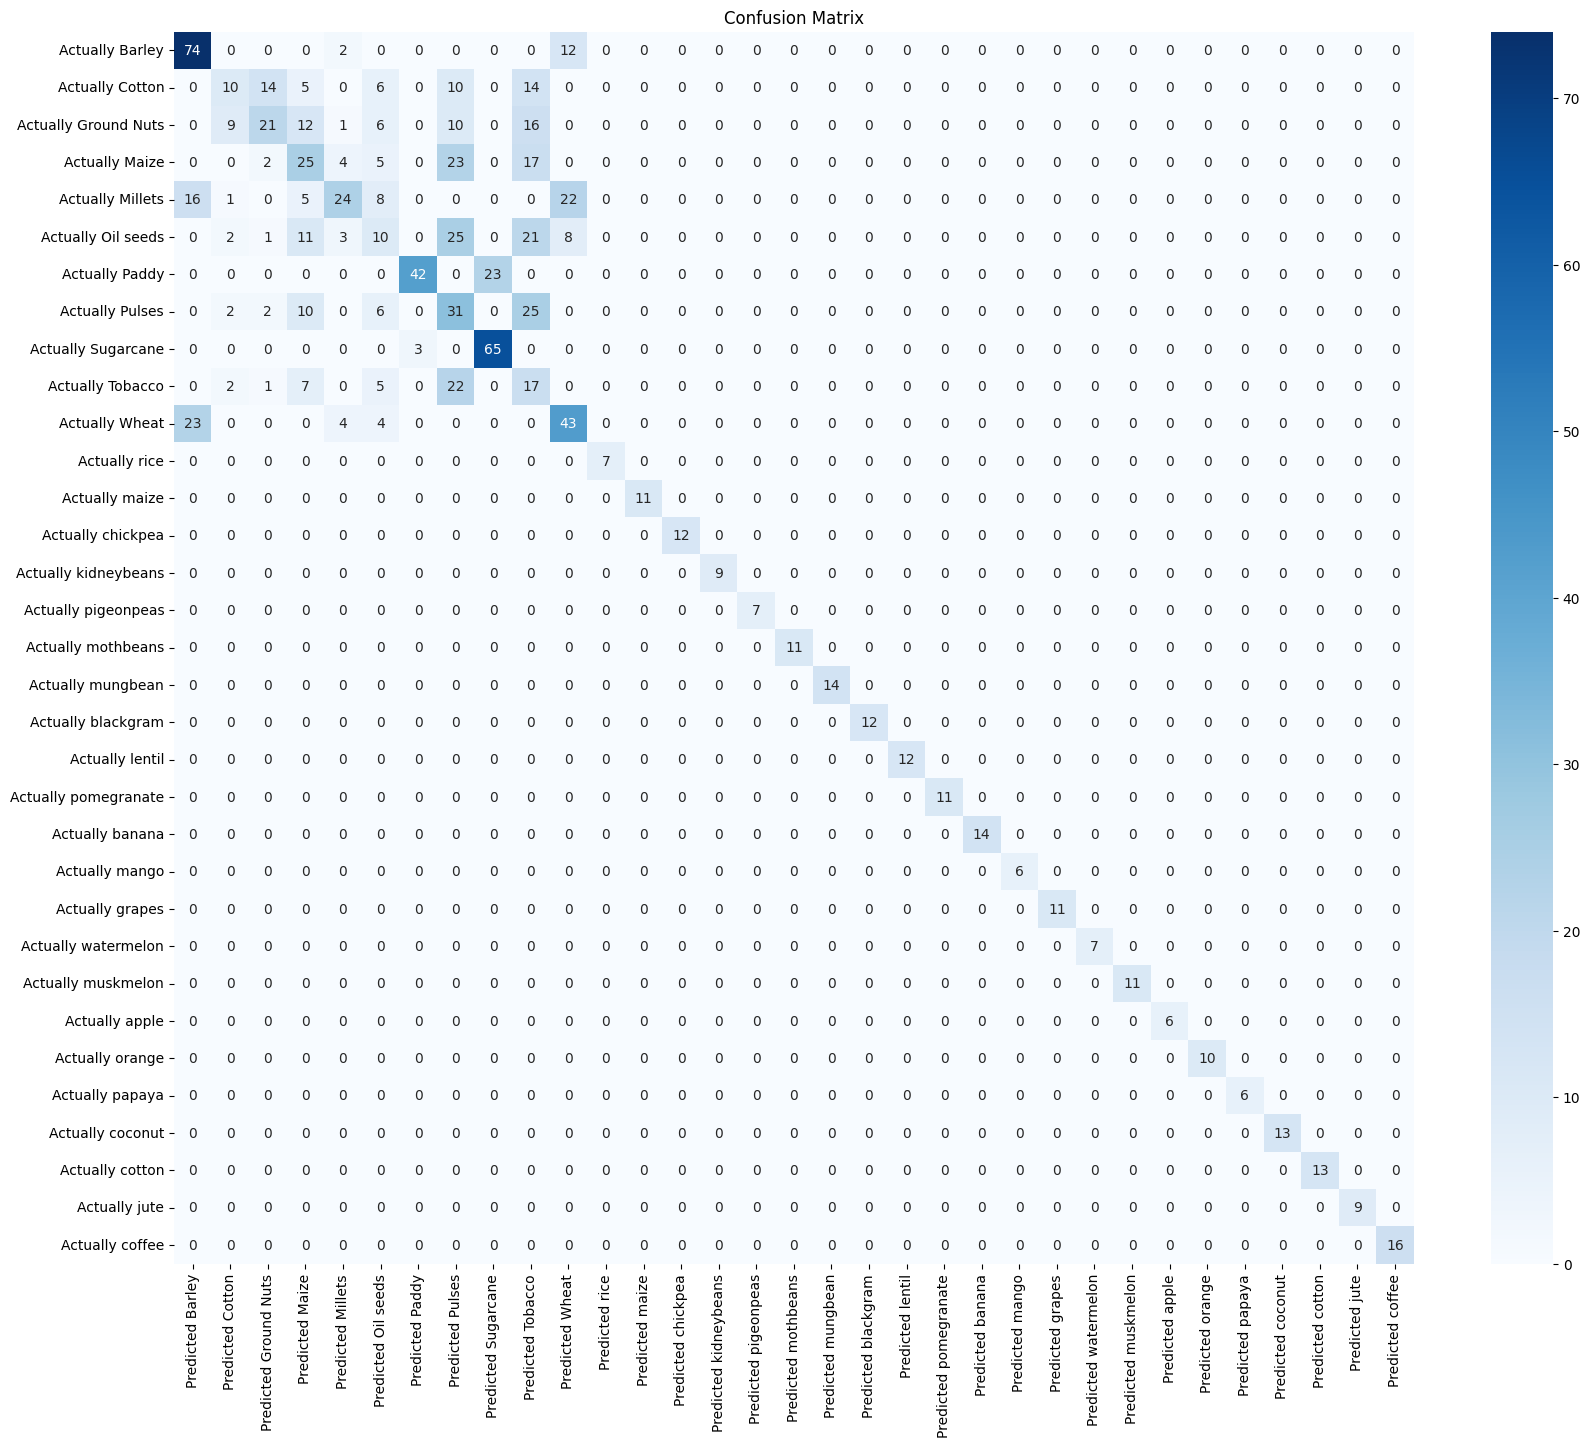

In [115]:
print("Confusion Matrix:")
CM = confusion_matrix(output_test, prediction_ecoded)
crop_list = crops_data['Crop Type'].unique().tolist()
plt.figure(figsize=(20, 16)) 
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Predicted {crop}' for crop in crop_list],
            yticklabels=[f'Actually {crop}' for crop in crop_list])
plt.title('Confusion Matrix')
plt.show()

In [116]:
probabiltity = get_high_confidence_recommendations(model=model,input_features=[6,10,4,24.26,61.88,6.84880954,65.71,621.0652287],crop_encoder=label_crops)
print(probabiltity)

[{'crop': 'Maize', 'percentage': '65.8%'}]


d:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### EXPORTING THE MODEL

In [117]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Your existing training code...
# df = pd.DataFrame({...})
# model = RandomForestClassifier(...)
# model.fit(X, y)

print("=== EXPORTING YOUR MODEL ===")

# Save the model
joblib.dump(model, 'crop_model.joblib')
print("✅ Model saved as 'crop_model.joblib'")

# Save the encoders

joblib.dump(label_crops, 'crop_encoder.joblib')
print("✅ Encoders saved")

# Also save feature names for reference
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.joblib')
print("✅ Feature names saved")

print("\n📁 Files created:")
print("- crop_model.joblib")
print("- soil_encoder.joblib") 
print("- crop_encoder.joblib")
print("- feature_names.joblib")

=== EXPORTING YOUR MODEL ===
✅ Model saved as 'crop_model.joblib'
✅ Encoders saved
✅ Feature names saved

📁 Files created:
- crop_model.joblib
- soil_encoder.joblib
- crop_encoder.joblib
- feature_names.joblib
